<a href="https://colab.research.google.com/github/TaeminDA/portfolio/blob/main/basic/multiclass/Star_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Star Type Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics

***

## EDA

Star Type Classification <br>
For comparing all models of ML <br>
It can be used for prediction <br>

Temperature -- K <br>
L -- Relative Luminosity <br>
R -- Relative Radius <br>
AM -- Absolute Magnitude <br>
Color -- General Color of Spectrum <br>
Spectral_Class -- O,B,A,F,G,K,M / SMASS - https://en.wikipedia.org/wiki/Asteroid_spectral_types <br>
Type -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants
<br>
<br>
<br>


---



---


TARGET: <br>
Type: from 0 to 5<br>
<br>
Red Dwarf - 0 <br>
Brown Dwarf - 1 <br>
White Dwarf - 2 <br>
Main Sequence - 3 <br>
Super Giants - 4 <br> 
Hyper Giants - 5 <br> 
MATH:<br> 
<br> 
Lo = 3.828 x 10^26 Watts <br> 
(Avg Luminosity of Sun) <br>
Ro = 6.9551 x 10^8 m <br>
(Avg Radius of Sun) <br>

In [2]:
df =pd.read_csv("/content/stars.csv")

In [3]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [4]:
#df["Color"] = df["Color"].astype("object")
#df["Spectral_Class"] = df["Spectral_Class"].astype("object")
df["Type"] = df["Type"].astype("object")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 13.2+ KB


**also Data Anaylsis with Tableau!**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Type Distribution ')

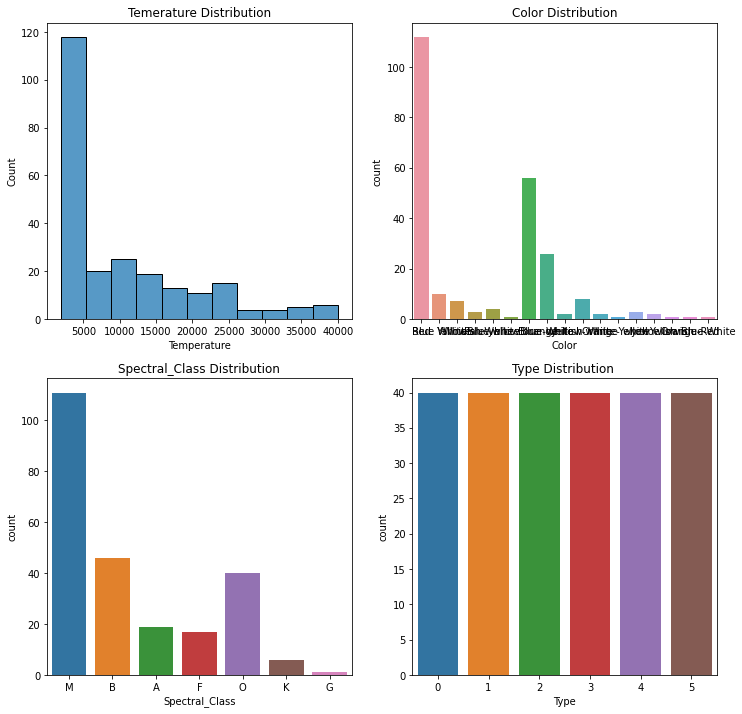

In [6]:
fig, ax = plt.subplots(2,2,figsize=(12,12))

sns.histplot(df["Temperature"] , ax = ax[0,0])
ax[0,0].set_title("Temerature Distribution")

sns.countplot(df["Color"] , ax = ax[0,1])
ax[0,1].set_title("Color Distribution")

sns.countplot(df["Spectral_Class"] , ax = ax[1,0])
ax[1,0].set_title("Spectral_Class Distribution")

sns.countplot(df["Type"] , ax = ax[1,1])
ax[1,1].set_title("Type Distribution ")

Text(0.5, 1.0, 'Scatter Temperature and Relative Luminosity according to the Color')

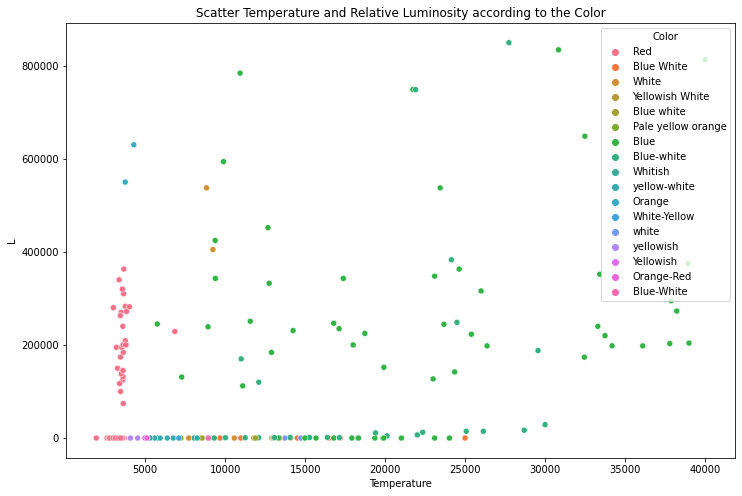

In [7]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x = "Temperature", y = "L", hue = "Color")
plt.title("Scatter Temperature and Relative Luminosity according to the Color")

Text(0.5, 1.0, 'Scatter Relative Radius and Relative Luminosity')

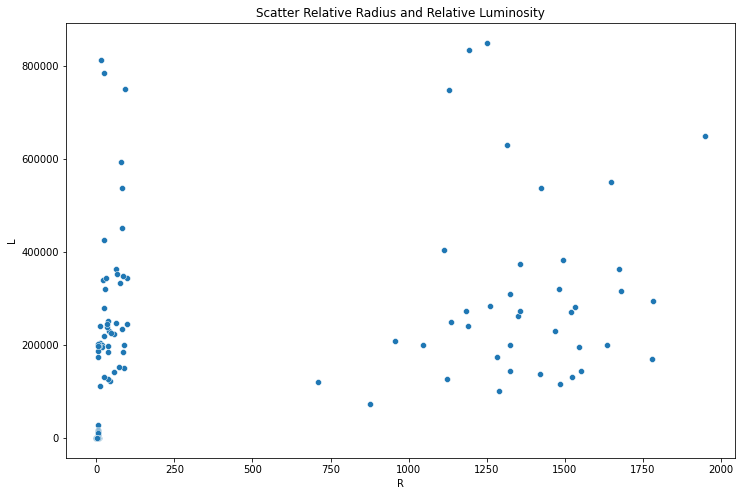

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x = "R", y = "L")
plt.title("Scatter Relative Radius and Relative Luminosity")

In [9]:
df_continuous = df[["Temperature","R","L","A_M"]]

In [10]:
# Correlation between continuous variables
df_continuous.corr()

,Temperature,R,L,A_M
Temperature,1.000000,0.064216,0.393404,-0.420261
R,0.064216,1.000000,0.526516,-0.608728
L,0.393404,0.526516,1.000000,-0.692619
A_M,-0.420261,-0.608728,-0.692619,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

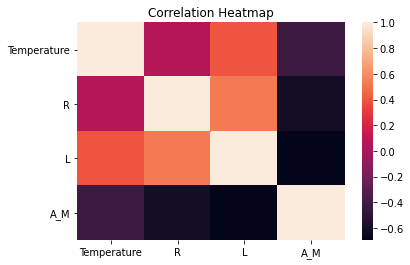

In [11]:
sns.heatmap(df_continuous.corr())
plt.title("Correlation Heatmap")

***

In [12]:
#df.to_csv("stars_df")

## Multi Class Classification

**Data Preprossessing**

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')

In [15]:
categorical_columns = ['Color', 'Spectral_Class']

In [16]:
ohe_dataset = ohe.fit_transform(df[categorical_columns])
columns_ohe = ohe.get_feature_names(input_features = df[categorical_columns].columns)
ohe_dataset = pd.DataFrame(ohe_dataset.toarray())
ohe_dataset.columns = columns_ohe
df_OH = pd.concat([df.drop(categorical_columns,axis = 1),ohe_dataset],axis = 1)

In [17]:
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

X = df_OH.drop("Type", axis = 1)
y_dnn = np_utils.to_categorical(df_OH["Type"])
y = df_OH["Type"]

In [18]:
y_dnn

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

**Normalization**

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

min_heart = X.min()
max_heart = X.max()

X_normalized = scaler.fit_transform(X)

X_normalized = pd.DataFrame(X_normalized)

X_normalized.columns = X.columns

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized,
                                                    y_dnn,
                                                    test_size=0.2,  
                                                    random_state=629)

### Deep Neural Network

In [21]:
import tensorflow as tf
from tensorflow import keras

In [22]:
## Multiclass Classification with Deep Neural Network

In [23]:
val_acc_threshold = 0.99
acc_threshold = 0.99

In [24]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if((logs.get('accuracy') > acc_threshold) & (logs.get('val_accuracy') > val_acc_threshold)):    
          print("Reached  val_accuracy, so stopping training!!".format(acc_threshold))
          self.model.stop_training = True

In [25]:
callbacks = myCallback()

In [26]:
model = keras.Sequential([
    keras.layers.Dense(64 , activation="relu"),
    keras.layers.Dense(32 , activation="relu"),
    keras.layers.Dense(32 , activation="relu"),
    keras.layers.Dense(6 , activation="softmax")
])

adam_opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam_opt, metrics=['accuracy'])

In [27]:
history = model.fit(X_train,
                    y_train,
                    epochs=500,
                    verbose=0,
                    callbacks=[callbacks],
                    validation_split = 0.2)

Reached  val_accuracy, so stopping training!!


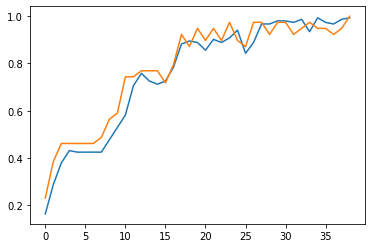

In [28]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [29]:
print("accuracy:",max(history.history["accuracy"]))
print("val_accuracy:",max(history.history["val_accuracy"]))

accuracy: 0.9934640526771545
val_accuracy: 1.0


In [30]:
y_dnn_pred = model.predict_classes(X_test)
y_dnn_pred = np.squeeze(y_dnn_pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### Support Vector Machine

In [31]:
encoder = preprocessing.LabelEncoder()
encoder.fit(y)

y = encoder.transform(y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized,
                                                    y,
                                                    test_size=0.2,  
                                                    random_state=629)

In [33]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [35]:
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=0)
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [36]:
print(grid.best_estimator_)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [37]:
clf = svm.SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
clf.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
y_svm_pred = clf.predict(X_test)

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_svm_pred))

Accuracy: 1.0


### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
# param_grid = {'max_depth': [80, 90, 100, 110],
#              'min_samples_leaf': [3, 4, 5],
#              'min_samples_split': [8, 10, 12],
#              'n_estimators': [100, 200, 300, 1000]}

In [43]:
# grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=0)
# grid.fit(X_train,y_train)

In [44]:
print(grid.best_estimator_)

# RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                        criterion='gini', max_depth=80, max_features='auto',
#                        max_leaf_nodes=None, max_samples=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=3, min_samples_split=8,
#                        min_weight_fraction_leaf=0.0, n_estimators=100,
#                        n_jobs=None, oob_score=False, random_state=None,
#                        verbose=0, warm_start=False)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [45]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
y_rf_pred = clf.predict(X_test)

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_rf_pred))

Accuracy: 1.0


## Summary

In [49]:
# Accuracy of Support Vector Machine : 1.0
# Accuracy of Random Forest : 1.0
# Accuracy of DNN: 1.0